(100, 2)
(100,)
(100, 1)


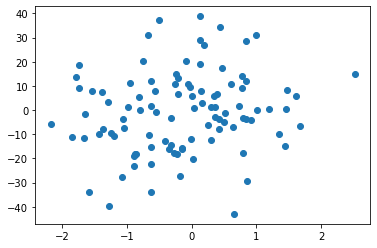

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
x, y =make_regression(n_samples=100, n_features=2, noise=10)
plt.scatter(x[:,0], y)
print (x.shape)
print(y.shape)
y=y.reshape(y.shape[0],1)
print(y.shape)

In [3]:
X =np.hstack((x, np.ones((x.shape[0],1))) )
print(X.shape)
print(X[:10])             
 #valeur aleatoire de param 
theta= np.random.randn(3,1)
theta

(100, 3)
[[ 0.84394662 -1.71457431  1.        ]
 [-0.34232334 -0.42833558  1.        ]
 [ 0.86387831 -1.64491039  1.        ]
 [-1.27617744 -1.42997766  1.        ]
 [ 0.49939128 -0.35637683  1.        ]
 [ 0.65010045 -2.92629936  1.        ]
 [-0.50132562  1.48397434  1.        ]
 [-0.32133877 -1.35871305  1.        ]
 [-1.64196927  0.10038824  1.        ]
 [ 0.15168705 -0.52583601  1.        ]]


array([[-1.12440772],
       [-0.77890534],
       [ 0.07787927]])

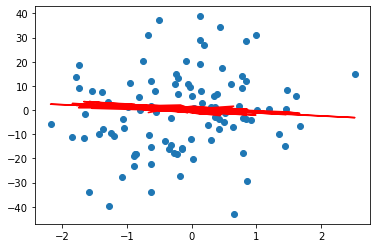

In [4]:
#model F= X*thetha 
#X matrice de dimension m*(n+1)
def model (X, theta):
    return X.dot(theta)

plt.scatter(x[:,0],y)
plt.plot(x[:,0],model(X, theta), c='r')


In [5]:
#fonction cout: erreur quoidratique moyen 1/2m*sum(X*theta-y)**2
def cost_function(x,y, theta):
    m=len(y)
    return 1/(2*m) *  np.sum((model(X, theta) -y)**2)
cost_function( x, y , theta)


152.36610609980008

In [9]:
#gradient 1/m* Xt(X*theta-y)
def grad(X, y, theta):
    m= len(y)
    return 1/m* X.T.dot(model(X, theta) -y) 
grad(X,y,theta)

array([[ -3.68644799],
       [-15.27711841],
       [  1.24062559]])

In [10]:
#gradient descent theta = theta-alpha* dj/d theta
def gradient_descent(X, y, theta, learning_rate, n_iterations):
        cost_history= np.zeros(n_iterations)
        theta_history= np.zeros((n_iterations, 3))
        for i in range(0, n_iterations):
            theta = theta - learning_rate * grad(X, y, theta)
            cost_history[i]= cost_function(X, y, theta) #pour avoir la convex de la courbe de performance
            theta_history[i,:] = theta.T
        return theta, cost_history, theta_history 

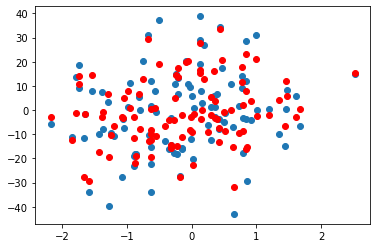

In [12]:
n_iterations = 100
learning_rate = 0.3
theta_final, cost_history,theta_hisory = gradient_descent(X, y, theta, learning_rate , n_iterations)
predictions= model(X, theta_final)
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], predictions, c='r')

# for i in range(n_iterations):
#     plt.plot(x,model(X, theta_history[i]))

In [142]:
# from mpl_toolkits.mplot3d import Axes3D
# %matplotlib notebook
# fig = plt.figure()
# ax= fig.add_subplot(111, projection= '3d')
# plt.scatter(x[:,0],x[:,1], y)
# plt.scatter(x[:,0],x[:,1], predictions)

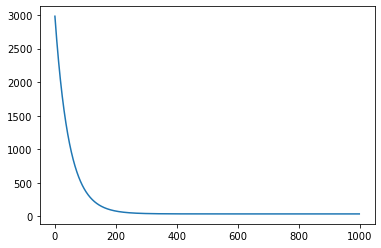

In [91]:
plt.plot(range(1000), cost_history)

In [92]:
#performence du model 
def coef_determination(y, pred):
    u=((y-pred)**2).sum()
    v= ((y-y.mean())**2).sum()
    return 1 - u/v
coef_determination(y, predictions)

0.9880553714514594